,discipline,no_of_professors,clarity,helpfulness,overall_quality,easiness
0,English,23343,3.756147,3.821866,3.791364,3.162754
1,Mathematics,22394,3.487379,3.641526,3.566867,3.063322
2,Biology,11774,3.608331,3.701530,3.657641,2.710459
3,Psychology,11179,3.909520,3.887536,3.900949,3.316210
4,History,11145,3.788818,3.753642,3.773746,3.053803
...,...,...,...,...,...,...
70,Anatomy,117,3.932991,3.974701,3.954188,2.863504
71,Earth Science,110,3.636182,3.671364,3.655091,3.106727
72,Linguistics,110,3.749000,3.834545,3.798182,3.309636
73,Mechanical Engineering,104,3.441923,3.531154,3.489327,2.799135


no_of_professors      int64
clarity             float64
helpfulness         float64
easiness            float64
dtype: object


Descriptive statistics for the predictors:



,no_of_professors,clarity,helpfulness,easiness
count,75.000000,75.000000,75.000000,75.000000
mean,2451.920000,3.709001,3.758165,3.185720
std,4304.393996,0.193952,0.170747,0.264374
min,102.000000,3.294321,3.418385,2.652054
25%,250.500000,3.610858,3.641150,3.028330
50%,913.000000,3.714076,3.748169,3.194300
75%,2499.500000,3.829838,3.881666,3.346941
max,23343.000000,4.159392,4.188919,3.882635


Correlation matrix for the predictors:


,no_of_professors,clarity,helpfulness,easiness
no_of_professors,1.000000,-0.141080,-0.117548,-0.167601
clarity,-0.141080,1.000000,0.955512,0.755251
helpfulness,-0.117548,0.955512,1.000000,0.717473
easiness,-0.167601,0.755251,0.717473,1.000000


Correlations between the predictors >  0.6  ?


,no_of_professors,clarity,helpfulness,easiness
no_of_professors,True,False,False,False
clarity,False,True,True,True
helpfulness,False,True,True,True
easiness,False,True,True,True


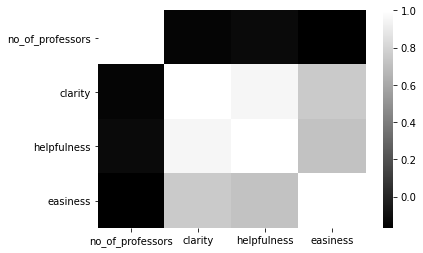

Several of the predictors have bivariate correlations > 0.6. Check for multicolinearity. 


<Figure size 432x288 with 0 Axes>

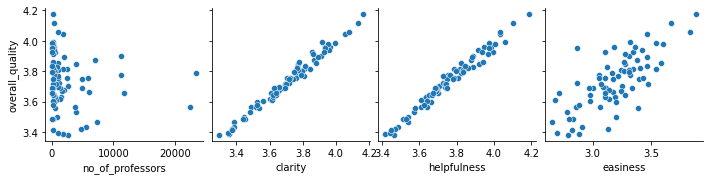

There are extreme outliers, check the "prop_outliers_array" and the corresponding element of "predictors.columns".

The predictors did not meet the requirements for linear regression. Check the outputs above.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels 
from mpl_toolkits.mplot3d import Axes3D
import scipy
import seaborn as sns


# data obtained from https://matthew-brett.github.io/cfd2019/chapters/04/df_series_arrays

df = pd.read_csv('rate_my_course.csv')
df.columns = ['discipline', 'no_of_professors', 'clarity', 'helpfulness',
       'overall_quality', 'easiness']
df.reset_index(inplace = True, drop = True)

display(df)

# checking the predictor data types

predictors = df[df.columns[(df.columns != 'discipline') & (df.columns != 'overall_quality')]]

display(predictors.dtypes)

# descriptive statistics

print('\nDescriptive statistics for the predictors:\n')
display(predictors.describe())

# checking for colinearity amongst the predictors using a correlation matrix

corr_mat = predictors.corr()

print('Correlation matrix for the predictors:')
display(corr_mat)

# specifying a cutoff for what will be considered extreme colinearity

colin_cutoff = 0.6

print('Correlations between the predictors > ', colin_cutoff, ' ?')
display(corr_mat > colin_cutoff)

# plotting a heatmap of the correlations between the predictors

plt.figure()
sns.heatmap(corr_mat, cmap = 'gray')
plt.show()

# counting the number of bivariate correlations between the predictors > the cutoff 
num_correlated_predictors = np.count_nonzero(corr_mat > colin_cutoff) - 4 # subtracting out the diagonal

lin_reg_checks = {'colinearity': 'pass/fail',
                 'outliers': 'pass/fail'}

if num_correlated_predictors > 2:
    print('Several of the predictors have bivariate correlations > '+str(colin_cutoff)+'. Check for multicolinearity. ')
    lin_reg_checks['colinearity'] = 'fail'
else:
    print('There is not evidence of multicolinearity.')
    lin_reg_checks['colinearity'] = 'pass'
    
# looking for outliers with a pairplot

plt.figure()
sns.pairplot(data = df, x_vars = predictors.columns.values, y_vars = 'overall_quality')
plt.show()

# checking for extreme outliers (+ or - 3 sd from the mean of the predictor)

prop_outliers_array = np.array([])
for i in predictors.columns.values:
    pred_mean = np.mean(predictors[i])
    pred_sd = np.std(predictors[i], ddof = 1)
    prop_outliers = np.count_nonzero(np.abs(predictors[i]) > pred_mean + 3 * pred_sd)/len(predictors[i])
    prop_outliers_array = np.append(prop_outliers_array, prop_outliers)
    
if np.count_nonzero(prop_outliers_array > 0) > 0:
    print('There are extreme outliers, check the "prop_outliers_array" and the corresponding element of "predictors.columns".')
    lin_reg_checks['outliers'] = 'fail'
else:
    print('There are no extreme outliers.')
    lin_reg_checks['outliers'] = 'pass'
    
if np.count_nonzero(np.array([list(lin_reg_checks.values())]) == 'fail') == 0:
    print('\nThe predictors met the requirements for linear regression.')
else: 
    print('\nThe predictors did not meet the requirements for linear regression. Check the outputs above.')

In [2]:
# checking to see which predictors had extreme outliers
if len(prop_outliers_array) == len(predictors.columns):
    for i in np.arange(len(prop_outliers_array)):
        print(prop_outliers_array[i]*100,'% of observations were extreme outliers in for', predictors.columns[i])

2.666666666666667 % of observations were extreme outliers in for no_of_professors
0.0 % of observations were extreme outliers in for clarity
0.0 % of observations were extreme outliers in for helpfulness
0.0 % of observations were extreme outliers in for easiness


In [3]:
# dropping the no_of_professors variable

predictors = predictors[predictors.columns[predictors.columns != 'no_of_professors']]

# writing a function to calulate the variance inflation factor of a set of predictors
# info from: https://blog.minitab.com/blog/starting-out-with-statistical-software/what-in-the-world-is-a-vif
# https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/
def vif(exog):
    vif_array = np.array([])
    for i in exog.columns:
        not_i = exog.columns[exog.columns != i]
        current_pred = exog[i]
        other_preds = exog[not_i]
        pred_mod = sm.OLS(current_pred, other_preds).fit()
        r_sq_i = pred_mod.rsquared 
        vif = 1/(1-r_sq_i)
        vif_array = np.append(vif_array, vif)
        
    output = pd.DataFrame({'predictor': exog.columns.values, 'VIF': vif_array})
    return output

# assessing multicolinearity using the variance inflation function
vif_df = vif(predictors)
display(vif_df)

# dropping the predictor with the highest VIF 

less_predictors = predictors.drop(vif_df['predictor'].iloc[np.where(vif_df['VIF'].max())], axis = 1).copy()


,predictor,VIF
0,clarity,4608.879161
1,helpfulness,3991.501706
2,easiness,337.748345


helpfulness    float64
easiness       float64
dtype: object


Descriptive statistics for the predictors:



,helpfulness,easiness
count,75.000000,75.000000
mean,3.758165,3.185720
std,0.170747,0.264374
min,3.418385,2.652054
25%,3.641150,3.028330
50%,3.748169,3.194300
75%,3.881666,3.346941
max,4.188919,3.882635


Correlation matrix for the predictors:


,helpfulness,easiness
helpfulness,1.000000,0.717473
easiness,0.717473,1.000000


Correlations between the predictors >  0.6  ?


,helpfulness,easiness
helpfulness,True,True
easiness,True,True


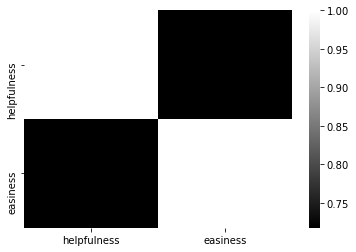

There is not evidence of multicolinearity.


<Figure size 432x288 with 0 Axes>

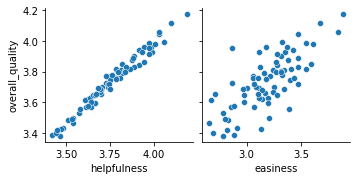

There are no extreme outliers.

The predictors met the requirements for linear regression.


In [4]:
# re-running the preliminary checks on the reduced set of predictors

# checking the predictor data types

predictors = less_predictors

display(predictors.dtypes)

# descriptive statistics

print('\nDescriptive statistics for the predictors:\n')
display(predictors.describe())

# checking for colinearity amongst the predictors using a correlation matrix

corr_mat = predictors.corr()

print('Correlation matrix for the predictors:')
display(corr_mat)

# specifying a cutoff for what will be considered extremem colinearity

colin_cutoff = 0.6

print('Correlations between the predictors > ', colin_cutoff, ' ?')
display(corr_mat > colin_cutoff)

# plotting a heatmap of the correlations between the predictors

plt.figure()
sns.heatmap(corr_mat, cmap = 'gray')
plt.show()

# counting the number of bivariate correlations between the predictors > the cutoff 
num_correlated_predictors = np.count_nonzero(corr_mat > colin_cutoff) - 4 # subtracting out the diagonal

lin_reg_checks = {'colinearity': 'pass/fail',
                 'outliers': 'pass/fail'}

if num_correlated_predictors > 2:
    print('Several of the predictors have bivariate correlations > '+str(colin_cutoff)+'. Check for multicolinearity. ')
    lin_reg_checks['colinearity'] = 'fail'
else:
    print('There is not evidence of multicolinearity.')
    lin_reg_checks['colinearity'] = 'pass'
    
# looking for outliers with a pairplot

plt.figure()
sns.pairplot(data = df, x_vars = predictors.columns.values, y_vars = 'overall_quality')
plt.show()

# checking for extreme outliers (+ or - 3 sd from the mean of the predictor)

prop_outliers_array = np.array([])
for i in predictors.columns.values:
    pred_mean = np.mean(predictors[i])
    pred_sd = np.std(predictors[i], ddof = 1)
    prop_outliers = np.count_nonzero(np.abs(predictors[i]) > pred_mean + 3 * pred_sd)/len(predictors[i])
    prop_outliers_array = np.append(prop_outliers_array, prop_outliers)
    
if np.count_nonzero(prop_outliers_array > 0) > 0:
    print('There are extreme outliers, check the "prop_outliers_array" and the corresponding element of "predictors.columns".')
    lin_reg_checks['outliers'] = 'fail'
else:
    print('There are no extreme outliers.')
    lin_reg_checks['outliers'] = 'pass'
    
if np.count_nonzero(np.array([list(lin_reg_checks.values())]) == 'fail') == 0:
    print('\nThe predictors met the requirements for linear regression.')
else: 
    print('\nThe predictors did not meet the requirements for linear regression. Check the outputs above.')

In [5]:
# multiple linear regression (overall quality ~ b0 + + easiness + no_of_professors + clarity + helpfulness)

outcome = df['overall_quality'].copy()

# adding a constant to the predictors

predictors = sm.add_constant(predictors)

mul_lin_reg_mod = sm.OLS(outcome, predictors).fit()

print(mul_lin_reg_mod.summary())

# writing a function to check that the assumptions of linear regression regarding the distribution of residuals are met
# e.g. normality, independence of errors and homogeneity of variance

def lin_reg_res_checker(residuals, predictor_vars):
    norm_test = scipy.stats.normaltest(residuals)
    autocorr_test = sm.stats.stattools.durbin_watson(residuals)
    homosced_test = sm.stats.diagnostic.het_breuschpagan(residuals, predictor_vars)

    print()
    if norm_test.pvalue > 0.05:
        print('The Omnibus test indicates that the residuals are normally distributed.')
    elif norm_test.pvalue <= 0.05:
        print('The Omnibus test indicates that the residuals are NOT normally distributed.')

    if autocorr_test > 1.5  and autocorr_test < 2.5 : # https://www.statisticshowto.com/durbin-watson-test-coefficient/
        print('The Durbin-Watson test indicates that the residuals are not autocorrelated.')
    elif autocorr_test <= 1.5 or autocorr_test >= 2.5:
        print('The Durbin-Watson test indicates that the residuals ARE autocorrelated.')

    if homosced_test[1] > 0.05 and homosced_test[-1] > 0.05:
        print('The Breusch-Pagan Lagrange Multiplier test indicates that the residuals are homoscedastic.')

    elif homosced_test[1] <= 0.05 or homosced_test[-1] <=  0.05:
        print('The Breusch-Pagan Lagrange Multiplier test indicates that the residuals are HETEROscedastic')

    if norm_test.pvalue > 0.05 and autocorr_test > 1.5 and autocorr_test < 2.5 and homosced_test[1] > 0.05 and homosced_test[-1] > 0.05:
        print('\nThe tests on the residuals show that the assumptions of linear regression were met.')
    else:
        print('\nSome of the assumptions of linear regression regarding the distribution of residuals were not met. See the specific test printouts above.')
        
lin_reg_res_checker(mul_lin_reg_mod.resid, predictors)

                            OLS Regression Results                            
Dep. Variable:        overall_quality   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1587.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           2.88e-60
Time:                        20:48:02   Log-Likelihood:                 165.36
No. Observations:                  75   AIC:                            -324.7
Df Residuals:                      72   BIC:                            -317.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1311      0.072     -1.826      

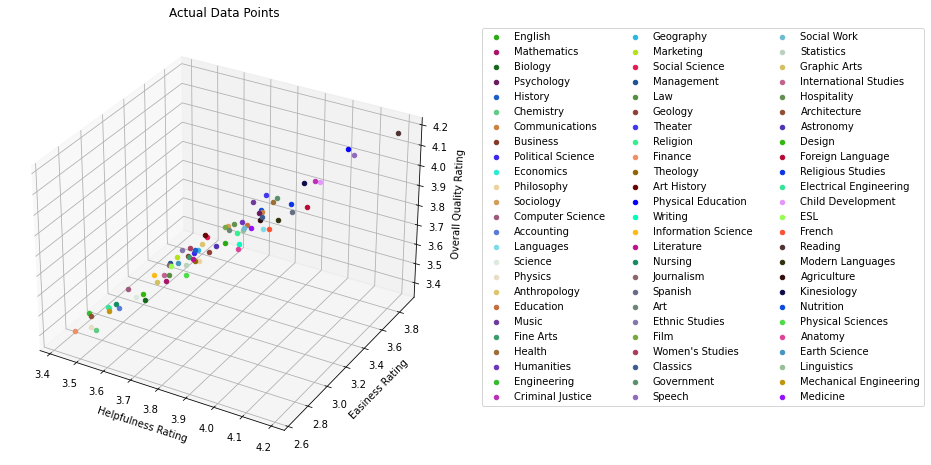

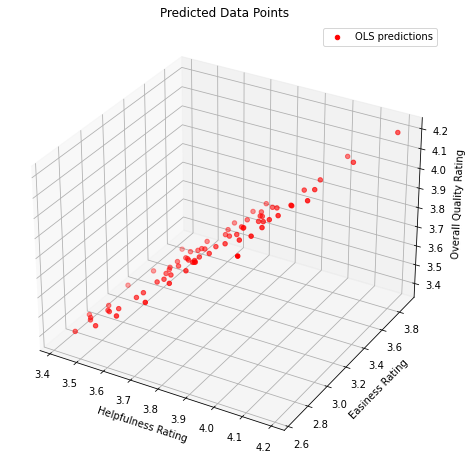

In [6]:
# plotting the data

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

zero_1 = np.random.uniform(0,1, size = 100000)
cmap = np.random.choice(zero_1, replace = False, size = len(df)+2)

for i in range(len(df)):
    ax.scatter(df['helpfulness'].iloc[i], df['easiness'].iloc[i], df['overall_quality'].iloc[i],  
               label = df['discipline'][i],
              color = [cmap[i], cmap[i+1], cmap[i+2]])
plt.title('Actual Data Points')
plt.xlabel('Helpfulness Rating')
plt.ylabel('Easiness Rating')
plt.legend(loc='upper center', bbox_to_anchor=(1.6, 1), ncol = 3)
ax.set_zlabel('Overall Quality Rating')
plt.show()

predicted_values = mul_lin_reg_mod.predict(predictors)


fig_2 = plt.figure(figsize = (10,8))
ax_2 = fig_2.add_subplot(111, projection='3d')

ax_2.scatter(df['helpfulness'], df['easiness'], predicted_values, label = 'OLS predictions', 
           color = 'red')

plt.title('Predicted Data Points')
plt.xlabel('Helpfulness Rating')
plt.ylabel('Easiness Rating')
plt.legend(loc = 'upper right')
ax_2.set_zlabel('Overall Quality Rating')
plt.show()